# PlantSpy 3 - Modele Combine - Classification Espece +  type de maladie 
####  - Especes: Tomato, Potato, Corn, Apple, Grape
####  - Pas de modele detection de maladie

## Importer les librairies et connection au Drive

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import cv2
import tensorflow as tf
import os
import pathlib
from PIL import Image 
from sklearn.model_selection import train_test_split
%matplotlib inline

from matplotlib import cm

from imblearn.under_sampling import RandomUnderSampler

from tensorflow.keras.layers import Input, Dense 
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dropout 
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Conv2D 
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import GlobalAveragePooling2D
from tensorflow.keras.utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras import Sequential
from tensorflow.keras import callbacks

from tensorflow.keras.applications.vgg16 import VGG16


from sklearn import metrics # Pour évaluer les modèles

import itertools # Pour créer des iterateurs

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Dictionnaires Type de maladie par especes

In [ ]:
# Grape
dict_maladie_Grape1 = { 0: 'Black_rot' ,
                 1: 'Esca_(Black_Measles)' ,
                 2 : 'Leaf_blight_(Isariopsis_Leaf_Spot)',
                 3: 'healthy'}

list_maladie_Grape1 =[ 'Black_rot' ,'Black_Measles' , 'Leaf_blight','healthy' ]

dict_maladie_Grape2 = { 0: 'Black_rot' ,
                 1: 'Esca_(Black_Measles)' ,
                 2 : 'Leaf_blight_(Isariopsis_Leaf_Spot)'}

list_maladie_Grape2 =[ 'Black_rot' ,'Black_Measles' , 'Leaf_blight' ]

#POTATO

dict_maladie_Potato1 = { 0: 'Early_blight' ,
                 1: 'Late_blight' ,
                 2: 'healthy' }

list_maladie_Potato1 =['Early_blight', 'Late_blight', 'healthy']

dict_maladie_Potato2 = { 0: 'Early_blight' ,
                 1: 'Late_blight' }

list_maladie_Potato2 =['Early_blight', 'Late_blight']

#TOMATO

dict_maladie_Tomato1 = { 0: 'Bacterial_spot' ,
                 1: 'Early_blight' ,
                 2 : 'Late_blight' ,
                 3 : 'Leaf_Mold',
                 4: 'Septoria_leaf_spot' ,
                 5: 'Spider_mites Two-spotted_spider_mite' ,
                 6: 'Target_Spot' ,
                 7 : 'Tomato_Yellow_Leaf_Curl_Virus' ,
                 8 : 'Tomato_mosaic_virus',
                 9 : 'healthy'}

list_maladie_Tomato1 = [ 'Bacterial_spot' ,'Early_blight', 'Late_blight' ,'Leaf_Mold','Septoria_leaf_spot' , 'Spider_mites Two-spotted_spider_mite' ,
                'Target_Spot' , 'Tomato_Yellow_Leaf_Curl_Virus' , 'Tomato_mosaic_virus', 'healthy'  ]

dict_maladie_Tomato2 = { 0: 'Bacterial_spot' ,
                 1: 'Early_blight' ,
                 2 : 'Late_blight' ,
                 3 : 'Leaf_Mold',
                 4: 'Septoria_leaf_spot' ,
                 5: 'Spider_mites Two-spotted_spider_mite' ,
                 6: 'Target_Spot' ,
                 7 : 'Tomato_Yellow_Leaf_Curl_Virus' ,
                 8 : 'Tomato_mosaic_virus',
                 9 : 'healthy'}

list_maladie_Tomato2 = [ 'Bacterial_spot' ,'Early_blight', 'Late_blight' ,'Leaf_Mold','Septoria_leaf_spot' , 'Spider_mites Two-spotted_spider_mite' ,
                'Target_Spot' , 'Tomato_Yellow_Leaf_Curl_Virus' , 'Tomato_mosaic_virus', 'healthy'  ]


# APPLE

dict_maladie_Apple1 = { 0: 'Apple_scab' ,
                 1: 'Black_rot' ,
                 2 : 'Cedar_apple_rust',
                3: 'healthy'}

list_maladie_Apple1 =[ 'Apple_scab' ,'Black_rot' ,'Cedar_apple_rust','healthy' ]

dict_maladie_Apple2 = { 0: 'Apple_scab' ,
                 1: 'Black_rot' ,
                 2 : 'Cedar_apple_rust'}

list_maladie_Apple2 =[ 'Apple_scab' ,'Black_rot' ,'Cedar_apple_rust' ]


# CORN

dict_maladie_Corn1 = { 2: 'Northern_Leaf_Blight' ,
                 1: 'Common_rust_' ,
                 0 : 'Cercospora_leaf_spot Gray_leaf_spot',
                 3: 'healthy'}

list_maladie_Corn1 =[ 'Cercospora_leaf_spot Gray_leaf_spot', 'Common_rust_' , 'Northern_Leaf_Blight','healthy' ]

dict_maladie_Corn2 = { 2: 'Northern_Leaf_Blight' ,
                 1: 'Common_rust_' ,
                 0 : 'Cercospora_leaf_spot Gray_leaf_spot'}

list_maladie_Corn2 =[ 'Cercospora_leaf_spot Gray_leaf_spot', 'Common_rust_' , 'Northern_Leaf_Blight']

# 1 - Classification : Especes Plantes

## Recuperation des donnees et data processing:




#### Valid Dataset

In [ ]:
folder_path = "/content/drive/MyDrive/NewPlantDiseasesDataset/valid/"

X_valid0=[]
y_valid_categorie=[]
y_valid_typeMaladie=[]

width = 100
height = 100 # resize to 100x100 to solve the RAM issue in Kaggle notebooks

for path, dirs, files in os.walk(folder_path):
    for repertoire in dirs:
      chemin=folder_path+repertoire
      for images in os.listdir(chemin):
        img=cv2.imread(chemin+'/'+images,cv2.IMREAD_COLOR )
        img_resized = cv2.resize(img, (width,height))
        X_valid0.append(np.array(img_resized))
        y_valid_categorie.append(repertoire.split('___')[0])   # On recupere la catégorie 
        y_valid_typeMaladie.append(repertoire.split('___')[1])   # On recupere le type de maladie seulement 


#### Data processing

In [ ]:
X_valid0= np.array(X_valid0)
X_valid0 = X_valid0.astype('float32')
X_valid = X_valid0 / 255
print(X_valid.shape)

X_valid= np.array(X_valid0)/255
X_valid = X_valid.astype('float32')

# y_valid_categorie.replace(to_replace={'Corn_(maize)', Cherry_(including_sour)  })
y_valid_categorie0 = np.array(y_valid_categorie)
y_valid_typeMaladie0 = np.array(y_valid_typeMaladie)

(17572, 100, 100, 3)


In [ ]:
from sklearn.preprocessing import LabelEncoder
encoderCat =  LabelEncoder()
y_valid_categorie = encoderCat.fit_transform(y_valid_categorie0)
#y_valid_categorie = encoderCat.fit(y_valid_categorie0)
#print(y_valid_categorie.shape)

encoderMal =  LabelEncoder()
y_valid_typeMaladie = encoderMal.fit_transform(y_valid_typeMaladie0)
print(y_valid_typeMaladie.shape)


(17572,)


#### load modele classification par categorie de Plantes

In [ ]:
# model_categorie = tf.keras.models.load_model('/content/drive/MyDrive/model_Classif_Categorie_Only_18K')
model_categorie = tf.keras.models.load_model('/content/drive/MyDrive/model_LeNet1_Categorie_AllData_Softmax')


In [ ]:
predict_categorie = model_categorie.predict(X_valid)


In [ ]:
predict_categorie_class = predict_categorie.argmax(axis = 1)

predict_categorie_label = encoderCat.inverse_transform(predict_categorie_class)
y_valid_categorie_label = encoderCat.inverse_transform(y_valid_categorie)

print(metrics.classification_report(y_valid_categorie_label, predict_categorie_label))

                         precision    recall  f1-score   support

                  Apple       0.94      0.96      0.95      1943
              Blueberry       0.96      0.96      0.96       454
Cherry_(including_sour)       0.98      0.95      0.96       877
           Corn_(maize)       0.99      0.98      0.98      1829
                  Grape       1.00      0.98      0.99      1805
                 Orange       0.99      0.96      0.98       503
                  Peach       0.98      0.89      0.93       891
           Pepper,_bell       0.97      0.86      0.92       975
                 Potato       0.89      0.99      0.93      1426
              Raspberry       0.98      0.96      0.97       445
                Soybean       0.94      0.94      0.94       505
                 Squash       0.96      0.99      0.98       434
             Strawberry       0.97      0.98      0.98       900
                 Tomato       0.96      0.98      0.97      4585

               accuracy

In [ ]:
pd.DataFrame(predict_categorie_label, columns=["predicted_categorie"]).head()

,predicted_categorie
0,Apple
1,Apple
2,Apple
3,Squash
4,Apple


In [ ]:
df_predict_categorie_label = pd.DataFrame(predict_categorie_label, columns=["predicted_categorie"])
df_predict_categorie_label.value_counts()

predicted_categorie    
Tomato                     4670
Apple                      1973
Corn_(maize)               1795
Grape                      1775
Potato                     1583
Strawberry                  914
Pepper,_bell                865
Cherry_(including_sour)     850
Peach                       809
Soybean                     510
Orange                      489
Blueberry                   454
Squash                      449
Raspberry                   436
dtype: int64

# Predict type maladie de "Grape"

#### Predicted Grape

In [ ]:
model_maladieGrape = tf.keras.models.load_model('/content/drive/MyDrive/model_Grape1_Healthy')

In [ ]:
# liste des maladies "Grape"
y_valid_typeMaladie_Grape = y_valid_typeMaladie0[y_valid_categorie0=="Grape"]
print(pd.DataFrame(y_valid_typeMaladie_Grape).value_counts())

Esca_(Black_Measles)                  480
Black_rot                             472
Leaf_blight_(Isariopsis_Leaf_Spot)    430
healthy                               423
dtype: int64


In [ ]:
X_img_predicted_Grape  = X_valid[df_predict_categorie_label['predicted_categorie'] == "Grape"]

In [ ]:
predict_typeMaladieGrape = model_maladieGrape.predict(X_img_predicted_Grape)


In [ ]:
predict_typeMaladieGrape_class = predict_typeMaladieGrape.argmax(axis = 1)

In [ ]:
# # Pour retrouver facilement les noms des labels
# dict_maladie_Grape1 = { 0: 'Black_rot' ,
#                  1: 'Esca_(Black_Measles)' ,
#                  2 : 'Leaf_blight_(Isariopsis_Leaf_Spot)',
#                  3: 'healthy'}

# list_maladie_Grape1 =[ 'Black_rot' ,'Black_Measles' , 'Leaf_blight','healthy' ]

In [ ]:
predict_typeMaladieGrape_label = (pd.DataFrame(predict_typeMaladieGrape_class, columns=['maladie_pred'])).replace({"maladie_pred": dict_maladie_Grape1})
predict_typeMaladieGrape_label.head()

,maladie_pred
0,Esca_(Black_Measles)
1,Black_rot
2,Black_rot
3,Black_rot
4,Black_rot


In [ ]:
pd.DataFrame(predict_typeMaladieGrape_label).value_counts()

maladie_pred                      
Esca_(Black_Measles)                  500
Black_rot                             442
Leaf_blight_(Isariopsis_Leaf_Spot)    433
healthy                               400
dtype: int64

In [ ]:
actual_typeMaladieGrape_label = pd.DataFrame(y_valid_typeMaladie0[df_predict_categorie_label['predicted_categorie'] == "Grape"], columns=["Maladie_reelle"])

In [ ]:
actual_typeMaladieGrape_label.value_counts()

Maladie_reelle                     
Esca_(Black_Measles)                   479
Black_rot                              467
Leaf_blight_(Isariopsis_Leaf_Spot)     424
healthy                                398
Bacterial_spot                           3
Cercospora_leaf_spot Gray_leaf_spot      2
Early_blight                             1
Septoria_leaf_spot                       1
dtype: int64

In [ ]:
df_predicted_Grape=pd.concat([actual_typeMaladieGrape_label, predict_typeMaladieGrape_label],axis=1)
df_predicted_Grape.head()


,Maladie_reelle,maladie_pred
0,Cercospora_leaf_spot Gray_leaf_spot,Esca_(Black_Measles)
1,Cercospora_leaf_spot Gray_leaf_spot,Black_rot
2,Black_rot,Black_rot
3,Black_rot,Black_rot
4,Black_rot,Black_rot


In [ ]:
actual_categorie_Grape = pd.DataFrame(y_valid_categorie0[df_predict_categorie_label['predicted_categorie'] == "Grape"], columns=["categorie_reelle"])

In [ ]:
df_predicted_Grape=pd.concat([df_predicted_Grape, actual_categorie_Grape ],axis=1)


In [ ]:
df_predicted_Grape.loc[df_predicted_Grape.categorie_reelle!="Grape",'Maladie_reelle']='not_grape'

df_predicted_Grape=df_predicted_Grape.drop(["categorie_reelle"],axis=1)

In [ ]:
pd.crosstab(df_predicted_Grape['Maladie_reelle'],df_predicted_Grape['maladie_pred'])

maladie_pred,Black_rot,Esca_(Black_Measles),Leaf_blight_(Isariopsis_Leaf_Spot),healthy
Maladie_reelle,,,,
Black_rot,437,22,7,1
Esca_(Black_Measles),3,475,1,0
Leaf_blight_(Isariopsis_Leaf_Spot),0,0,423,1
healthy,0,0,0,398
not_grape,2,3,2,0


#### Not predicted Grape

In [ ]:
df_NOT_predicted_Grape=pd.DataFrame(y_valid_typeMaladie0[df_predict_categorie_label['predicted_categorie'] != "Grape"], columns=["Maladie_reelle"])
df_NOT_predicted_Grape['maladie_pred']='not_grape'


In [ ]:
actual_categorie_Grape2 = pd.DataFrame(y_valid_categorie0[df_predict_categorie_label['predicted_categorie'] != "Grape"], columns=["categorie_reelle"])
df_NOT_predicted_Grape=pd.concat([df_NOT_predicted_Grape, actual_categorie_Grape2 ],axis=1)


In [ ]:
df_NOT_predicted_Grape.loc[df_NOT_predicted_Grape.categorie_reelle!="Grape",'Maladie_reelle']='not_grape'

df_NOT_predicted_Grape=df_NOT_predicted_Grape.drop(["categorie_reelle"],axis=1)


In [ ]:
pd.crosstab(df_NOT_predicted_Grape['Maladie_reelle'],df_NOT_predicted_Grape['maladie_pred'])

maladie_pred,not_grape
Maladie_reelle,
Black_rot,5
Esca_(Black_Measles),1
Leaf_blight_(Isariopsis_Leaf_Spot),6
healthy,25
not_grape,15760


#### Predictions des deux modeles

In [ ]:
df_Grape=pd.concat([df_NOT_predicted_Grape,df_predicted_Grape],axis=0)


In [ ]:
pd.crosstab(df_Grape['Maladie_reelle'],df_Grape['maladie_pred'])

maladie_pred,Black_rot,Esca_(Black_Measles),Leaf_blight_(Isariopsis_Leaf_Spot),healthy,not_grape
Maladie_reelle,,,,,
Black_rot,437,22,7,1,5
Esca_(Black_Measles),3,475,1,0,1
Leaf_blight_(Isariopsis_Leaf_Spot),0,0,423,1,6
healthy,0,0,0,398,25
not_grape,2,3,2,0,15760


In [ ]:
print(metrics.classification_report(df_Grape['Maladie_reelle'],df_Grape['maladie_pred']))

                                    precision    recall  f1-score   support

                         Black_rot       0.99      0.93      0.96       472
              Esca_(Black_Measles)       0.95      0.99      0.97       480
Leaf_blight_(Isariopsis_Leaf_Spot)       0.98      0.98      0.98       430
                           healthy       0.99      0.94      0.97       423
                         not_grape       1.00      1.00      1.00     15767

                          accuracy                           1.00     17572
                         macro avg       0.98      0.97      0.97     17572
                      weighted avg       1.00      1.00      1.00     17572



['Black_rot', 'Black_Measles', 'Leaf_blight', 'healthy', 'not_grape', 'not_grape', 'not_grape']


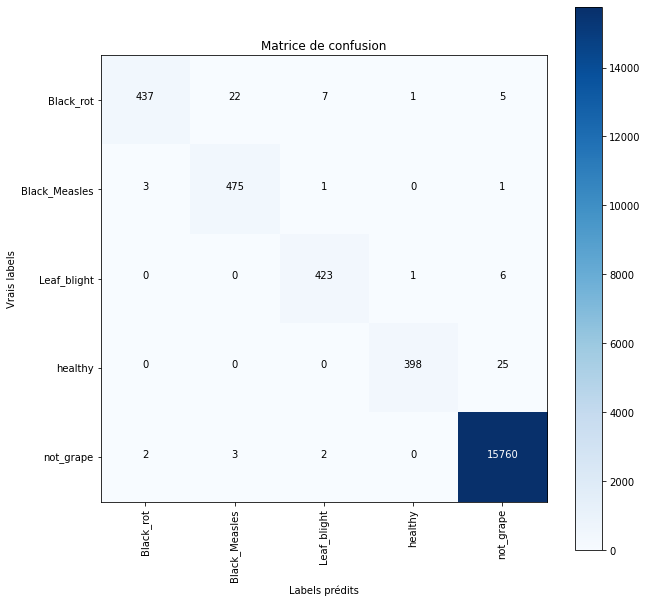

In [ ]:
# Matrice de Confusion

cnf_matrix = metrics.confusion_matrix(df_Grape['Maladie_reelle'],df_Grape['maladie_pred'])

classes = range(0,5)

liste=list_maladie_Grape1
liste.append("not_grape")
print(list_maladie_Grape1)

plt.figure(figsize=(10, 10))


plt.imshow(cnf_matrix, interpolation='nearest',cmap='Blues')
plt.title("Matrice de confusion")
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)

for i, j in itertools.product(range(cnf_matrix.shape[0]), range(cnf_matrix.shape[1])):
    plt.text(j, i, cnf_matrix[i, j],
             horizontalalignment="center",
             color="white" if cnf_matrix[i, j] > ( cnf_matrix.max() / 2) else "black")

plt.yticks([0,1,2,3,4],liste)
plt.ylabel('Vrais labels')
plt.xticks([0,1,2,3,4],liste,
                  rotation = 90)

plt.xlabel('Labels prédits')

plt.show()

# Predict type maladie de "Potato"

#### Predicted "potato"

In [ ]:
model_maladiePotato = tf.keras.models.load_model('/content/drive/MyDrive/model_Potato1_avecHealthy')


In [ ]:
# liste des maladies "Potato"
y_valid_typeMaladie_Potato = y_valid_typeMaladie0[y_valid_categorie0=="Potato"]
print(pd.DataFrame(y_valid_typeMaladie_Potato).value_counts())

Early_blight    485
Late_blight     485
healthy         456
dtype: int64


In [ ]:
# Pour retrouver facilement les noms des labels
# dict_maladie_Potato1 = { 0: 'Early_blight' ,
#                  1: 'Late_blight' ,
#                  2: 'healthy' }

# list_maladie_Potato1 =['Early_blight', 'Late_blight', 'healthy']

In [ ]:
X_img_predicted_Potato  = X_valid[df_predict_categorie_label['predicted_categorie'] == "Potato"]

In [ ]:
predict_typeMaladiePotato = model_maladiePotato.predict(X_img_predicted_Potato)


In [ ]:
predict_typeMaladiePotato_class = predict_typeMaladiePotato.argmax(axis = 1)

In [ ]:
predict_typeMaladiePotato_label = (pd.DataFrame(predict_typeMaladiePotato_class, columns=['maladie_pred'])).replace({"maladie_pred": dict_maladie_Potato1})
predict_typeMaladiePotato_label.head()

,maladie_pred
0,Late_blight
1,healthy
2,Late_blight
3,Late_blight
4,Late_blight


In [ ]:
pd.DataFrame(predict_typeMaladiePotato_label).value_counts()

maladie_pred
healthy         536
Early_blight    535
Late_blight     512
dtype: int64

In [ ]:
actual_typeMaladiePotato_label = pd.DataFrame(y_valid_typeMaladie0[df_predict_categorie_label['predicted_categorie'] == "Potato"], columns=["Maladie_reelle"])

In [ ]:
actual_typeMaladiePotato_label.value_counts()

Maladie_reelle                     
healthy                                520
Late_blight                            507
Early_blight                           491
Bacterial_spot                          17
Apple_scab                              14
Powdery_mildew                           8
Septoria_leaf_spot                       5
Cercospora_leaf_spot Gray_leaf_spot      4
Northern_Leaf_Blight                     4
Target_Spot                              4
Leaf_scorch                              3
Black_rot                                2
Haunglongbing_(Citrus_greening)          2
Cedar_apple_rust                         1
Leaf_blight_(Isariopsis_Leaf_Spot)       1
dtype: int64

In [ ]:
df_predicted_Potato=pd.concat([actual_typeMaladiePotato_label, predict_typeMaladiePotato_label],axis=1)
df_predicted_Potato.head()


,Maladie_reelle,maladie_pred
0,Apple_scab,Late_blight
1,Apple_scab,healthy
2,Apple_scab,Late_blight
3,Apple_scab,Late_blight
4,Apple_scab,Late_blight


In [ ]:
actual_categorie_potato = pd.DataFrame(y_valid_categorie0[df_predict_categorie_label['predicted_categorie'] == "Potato"], columns=["categorie_reelle"])

In [ ]:
df_predicted_Potato=pd.concat([df_predicted_Potato, actual_categorie_potato ],axis=1)


In [ ]:
pd.crosstab(df_predicted_Potato['Maladie_reelle'],df_predicted_Potato['maladie_pred'])

maladie_pred,Early_blight,Late_blight,healthy
Maladie_reelle,,,
Apple_scab,3,10,1
Bacterial_spot,3,8,6
Black_rot,1,1,0
Cedar_apple_rust,0,0,1
Cercospora_leaf_spot Gray_leaf_spot,4,0,0
Early_blight,483,7,1
Haunglongbing_(Citrus_greening),0,2,0
Late_blight,31,473,3
Leaf_blight_(Isariopsis_Leaf_Spot),0,1,0


In [ ]:
df_predicted_Potato.loc[df_predicted_Potato.categorie_reelle!="Potato",'Maladie_reelle']='not_potato'

df_predicted_Potato=df_predicted_Potato.drop(["categorie_reelle"],axis=1)

In [ ]:
pd.crosstab(df_predicted_Potato['Maladie_reelle'],df_predicted_Potato['maladie_pred'])

maladie_pred,Early_blight,Late_blight,healthy
Maladie_reelle,,,
Early_blight,480,0,0
Late_blight,27,447,3
healthy,0,0,449
not_potato,28,65,84


#### Not predicted Potato

In [ ]:
df_NOT_predicted_Potato=pd.DataFrame(y_valid_typeMaladie0[df_predict_categorie_label['predicted_categorie'] != "Potato"], columns=["Maladie_reelle"])
df_NOT_predicted_Potato['maladie_pred']='not_potato'


In [ ]:
actual_categorie_potato2 = pd.DataFrame(y_valid_categorie0[df_predict_categorie_label['predicted_categorie'] != "Potato"], columns=["categorie_reelle"])
df_NOT_predicted_Potato=pd.concat([df_NOT_predicted_Potato, actual_categorie_potato2 ],axis=1)


In [ ]:
df_NOT_predicted_Potato.loc[df_NOT_predicted_Potato.categorie_reelle!="Potato",'Maladie_reelle']='not_potato'

df_NOT_predicted_Potato=df_NOT_predicted_Potato.drop(["categorie_reelle"],axis=1)


In [ ]:
pd.crosstab(df_NOT_predicted_Potato['Maladie_reelle'],df_NOT_predicted_Potato['maladie_pred'])

maladie_pred,not_potato
Maladie_reelle,
Early_blight,5
Late_blight,8
healthy,7
not_potato,15969


#### Predictions des deux modeles

In [ ]:
df_Potato=pd.concat([df_NOT_predicted_Potato,df_predicted_Potato],axis=0)


In [ ]:
pd.crosstab(df_Potato['Maladie_reelle'],df_Potato['maladie_pred'])

maladie_pred,Early_blight,Late_blight,healthy,not_potato
Maladie_reelle,,,,
Early_blight,480,0,0,5
Late_blight,27,447,3,8
healthy,0,0,449,7
not_potato,28,65,84,15969


In [ ]:
print(metrics.classification_report(df_Potato['Maladie_reelle'],df_Potato['maladie_pred']))

              precision    recall  f1-score   support

Early_blight       0.90      0.99      0.94       485
 Late_blight       0.87      0.92      0.90       485
     healthy       0.84      0.98      0.91       456
  not_potato       1.00      0.99      0.99     16146

    accuracy                           0.99     17572
   macro avg       0.90      0.97      0.93     17572
weighted avg       0.99      0.99      0.99     17572



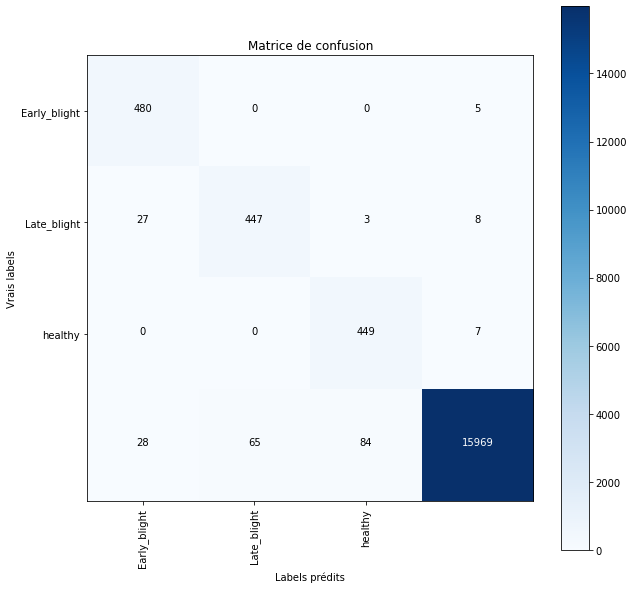

In [ ]:
# Matrice de Confusion

cnf_matrix = metrics.confusion_matrix(df_Potato['Maladie_reelle'],df_Potato['maladie_pred'])

classes = range(0,4)

liste=list_maladie_Potato1
liste.append("not_potato")


plt.figure(figsize=(10, 10))


plt.imshow(cnf_matrix, interpolation='nearest',cmap='Blues')
plt.title("Matrice de confusion")
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)

for i, j in itertools.product(range(cnf_matrix.shape[0]), range(cnf_matrix.shape[1])):
    plt.text(j, i, cnf_matrix[i, j],
             horizontalalignment="center",
             color="white" if cnf_matrix[i, j] > ( cnf_matrix.max() / 2) else "black")

plt.yticks([0,1,2,3],liste)
plt.ylabel('Vrais labels')
plt.xticks([0,1,2,3],liste,
                  rotation = 90)

plt.xlabel('Labels prédits')

plt.show()

# Predict type maladie de "Tomato"

#### Predicted "Tomato"

In [ ]:
model_maladieTomato = tf.keras.models.load_model('/content/drive/MyDrive/model_Tomate_avecHealthy_softmax')


In [ ]:
# liste des maladies "Tomato"
y_valid_typeMaladie_Tomato = y_valid_typeMaladie0[y_valid_categorie0=="Tomato"]
print(pd.DataFrame(y_valid_typeMaladie_Tomato).value_counts())

Tomato_Yellow_Leaf_Curl_Virus           490
healthy                                 481
Early_blight                            480
Leaf_Mold                               470
Late_blight                             463
Target_Spot                             457
Tomato_mosaic_virus                     448
Septoria_leaf_spot                      436
Spider_mites Two-spotted_spider_mite    435
Bacterial_spot                          425
dtype: int64


In [ ]:
# Pour retrouver facilement les noms des labels
# dict_maladie_Tomato1 = { 0: 'Bacterial_spot' ,
#                  1: 'Early_blight' ,
#                  2 : 'Late_blight' ,
#                  3 : 'Leaf_Mold',
#                  4: 'Septoria_leaf_spot' ,
#                  5: 'Spider_mites Two-spotted_spider_mite' ,
#                  6: 'Target_Spot' ,
#                  7 : 'Tomato_Yellow_Leaf_Curl_Virus' ,
#                  8 : 'Tomato_mosaic_virus',
#                  9 : 'healthy'}

# list_maladie_Tomato1 = [ 'Bacterial_spot' ,'Early_blight', 'Late_blight' ,'Leaf_Mold','Septoria_leaf_spot' , 'Spider_mites Two-spotted_spider_mite' ,
#                 'Target_Spot' , 'Tomato_Yellow_Leaf_Curl_Virus' , 'Tomato_mosaic_virus', 'healthy'  ]

In [ ]:
X_img_predicted_Tomato  = X_valid[df_predict_categorie_label['predicted_categorie'] == "Tomato"]

In [ ]:
predict_typeMaladieTomato = model_maladieTomato.predict(X_img_predicted_Tomato)


In [ ]:
predict_typeMaladieTomato_class = predict_typeMaladieTomato.argmax(axis = 1)

In [ ]:
predict_typeMaladieTomato_label = (pd.DataFrame(predict_typeMaladieTomato_class, columns=['maladie_pred'])).replace({"maladie_pred": dict_maladie_Tomato1})
predict_typeMaladieTomato_label.head()

,maladie_pred
0,Late_blight
1,Late_blight
2,Late_blight
3,Leaf_Mold
4,Early_blight


In [ ]:
pd.DataFrame(predict_typeMaladieTomato_label).value_counts()

maladie_pred                        
Early_blight                            658
healthy                                 624
Tomato_mosaic_virus                     484
Tomato_Yellow_Leaf_Curl_Virus           454
Target_Spot                             438
Spider_mites Two-spotted_spider_mite    432
Leaf_Mold                               410
Bacterial_spot                          409
Late_blight                             404
Septoria_leaf_spot                      357
dtype: int64

In [ ]:
actual_typeMaladieTomato_label = pd.DataFrame(y_valid_typeMaladie0[df_predict_categorie_label['predicted_categorie'] == "Tomato"], columns=["Maladie_reelle"])

In [ ]:
actual_typeMaladieTomato_label.value_counts()

Maladie_reelle                      
healthy                                 525
Bacterial_spot                          497
Tomato_Yellow_Leaf_Curl_Virus           490
Leaf_Mold                               468
Early_blight                            453
Target_Spot                             450
Tomato_mosaic_virus                     447
Spider_mites Two-spotted_spider_mite    435
Septoria_leaf_spot                      425
Late_blight                             423
Cedar_apple_rust                         16
Haunglongbing_(Citrus_greening)           9
Apple_scab                                7
Leaf_scorch                               6
Powdery_mildew                            5
Cercospora_leaf_spot Gray_leaf_spot       4
Black_rot                                 4
Northern_Leaf_Blight                      3
Leaf_blight_(Isariopsis_Leaf_Spot)        2
Common_rust_                              1
dtype: int64

In [ ]:
df_predicted_Tomato=pd.concat([actual_typeMaladieTomato_label, predict_typeMaladieTomato_label],axis=1)
df_predicted_Tomato.head()


,Maladie_reelle,maladie_pred
0,Apple_scab,Late_blight
1,Apple_scab,Late_blight
2,Apple_scab,Late_blight
3,Apple_scab,Leaf_Mold
4,Apple_scab,Early_blight


In [ ]:
actual_categorie_Tomato = pd.DataFrame(y_valid_categorie0[df_predict_categorie_label['predicted_categorie'] == "Tomato"], columns=["categorie_reelle"])

In [ ]:
df_predicted_Tomato=pd.concat([df_predicted_Tomato, actual_categorie_Tomato ],axis=1)


In [ ]:
df_predicted_Tomato.loc[df_predicted_Tomato.categorie_reelle!="Tomato",'Maladie_reelle']='not_Tomato'

df_predicted_Tomato=df_predicted_Tomato.drop(["categorie_reelle"],axis=1)

In [ ]:
pd.crosstab(df_predicted_Tomato['Maladie_reelle'],df_predicted_Tomato['maladie_pred'])

maladie_pred,Bacterial_spot,Early_blight,Late_blight,Leaf_Mold,Septoria_leaf_spot,Spider_mites Two-spotted_spider_mite,Target_Spot,Tomato_Yellow_Leaf_Curl_Virus,Tomato_mosaic_virus,healthy
Maladie_reelle,,,,,,,,,,
Bacterial_spot,364,40,1,0,1,1,5,1,0,1
Early_blight,0,435,3,0,2,2,5,0,1,1
Late_blight,1,47,355,2,0,2,0,0,0,11
Leaf_Mold,0,38,4,399,8,6,0,0,8,5
Septoria_leaf_spot,3,37,12,5,317,5,11,0,18,17
Spider_mites Two-spotted_spider_mite,0,5,0,0,0,357,26,0,8,39
Target_Spot,1,0,1,0,0,28,364,0,5,51
Tomato_Yellow_Leaf_Curl_Virus,11,8,4,0,0,14,3,450,0,0
Tomato_mosaic_virus,0,0,0,0,0,1,7,0,436,3


#### Not predicted Tomato

In [ ]:
df_NOT_predicted_Tomato=pd.DataFrame(y_valid_typeMaladie0[df_predict_categorie_label['predicted_categorie'] != "Tomato"], columns=["Maladie_reelle"])
df_NOT_predicted_Tomato['maladie_pred']='not_Tomato'


In [ ]:
actual_categorie_Tomato2 = pd.DataFrame(y_valid_categorie0[df_predict_categorie_label['predicted_categorie'] != "Tomato"], columns=["categorie_reelle"])
df_NOT_predicted_Tomato=pd.concat([df_NOT_predicted_Tomato, actual_categorie_Tomato2 ],axis=1)


In [ ]:
df_NOT_predicted_Tomato.loc[df_NOT_predicted_Tomato.categorie_reelle!="Tomato",'Maladie_reelle']='not_Tomato'

df_NOT_predicted_Tomato=df_NOT_predicted_Tomato.drop(["categorie_reelle"],axis=1)


In [ ]:
pd.crosstab(df_NOT_predicted_Tomato['Maladie_reelle'],df_NOT_predicted_Tomato['maladie_pred'])

maladie_pred,not_Tomato
Maladie_reelle,
Bacterial_spot,11
Early_blight,31
Late_blight,45
Leaf_Mold,2
Septoria_leaf_spot,11
Target_Spot,7
Tomato_mosaic_virus,1
healthy,2
not_Tomato,12792


#### Predictions des deux modeles

In [ ]:
df_Tomato=pd.concat([df_NOT_predicted_Tomato,df_predicted_Tomato],axis=0)


In [ ]:
pd.crosstab(df_Tomato['Maladie_reelle'],df_Tomato['maladie_pred'])

maladie_pred,Bacterial_spot,Early_blight,Late_blight,Leaf_Mold,Septoria_leaf_spot,Spider_mites Two-spotted_spider_mite,Target_Spot,Tomato_Yellow_Leaf_Curl_Virus,Tomato_mosaic_virus,healthy,not_Tomato
Maladie_reelle,,,,,,,,,,,
Bacterial_spot,364,40,1,0,1,1,5,1,0,1,11
Early_blight,0,435,3,0,2,2,5,0,1,1,31
Late_blight,1,47,355,2,0,2,0,0,0,11,45
Leaf_Mold,0,38,4,399,8,6,0,0,8,5,2
Septoria_leaf_spot,3,37,12,5,317,5,11,0,18,17,11
Spider_mites Two-spotted_spider_mite,0,5,0,0,0,357,26,0,8,39,0
Target_Spot,1,0,1,0,0,28,364,0,5,51,7
Tomato_Yellow_Leaf_Curl_Virus,11,8,4,0,0,14,3,450,0,0,0
Tomato_mosaic_virus,0,0,0,0,0,1,7,0,436,3,1


In [ ]:
print(metrics.classification_report(df_Tomato['Maladie_reelle'],df_Tomato['maladie_pred']))

                                      precision    recall  f1-score   support

                      Bacterial_spot       0.89      0.86      0.87       425
                        Early_blight       0.66      0.91      0.76       480
                         Late_blight       0.88      0.77      0.82       463
                           Leaf_Mold       0.97      0.85      0.91       470
                  Septoria_leaf_spot       0.89      0.73      0.80       436
Spider_mites Two-spotted_spider_mite       0.83      0.82      0.82       435
                         Target_Spot       0.83      0.80      0.81       457
       Tomato_Yellow_Leaf_Curl_Virus       0.99      0.92      0.95       490
                 Tomato_mosaic_virus       0.90      0.97      0.94       448
                             healthy       0.77      1.00      0.87       481
                          not_Tomato       0.99      0.98      0.99     12987

                            accuracy                          

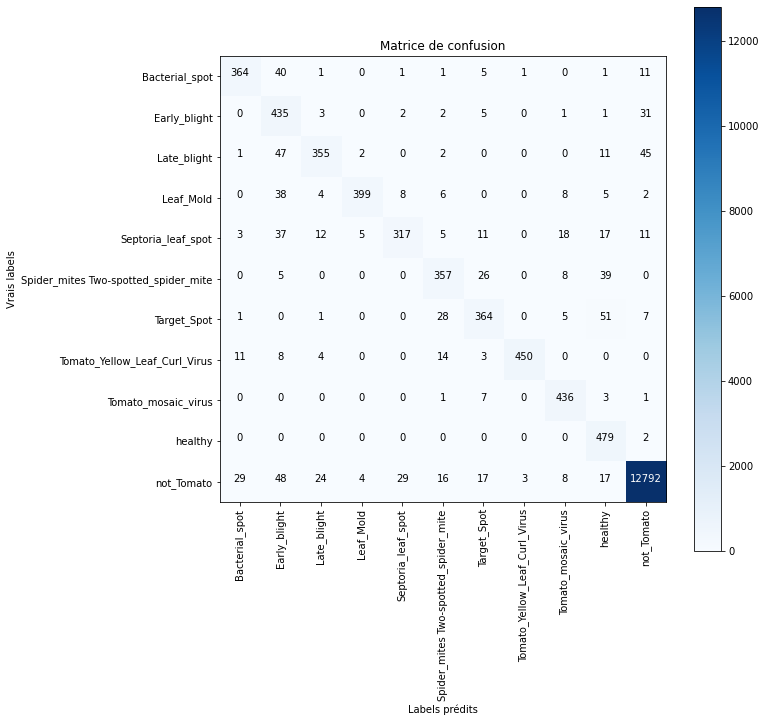

In [ ]:
# Matrice de Confusion

cnf_matrix = metrics.confusion_matrix(df_Tomato['Maladie_reelle'],df_Tomato['maladie_pred'])

classes = range(0,11)

liste=list_maladie_Tomato1
liste.append("not_tomato")


plt.figure(figsize=(10, 10))


plt.imshow(cnf_matrix, interpolation='nearest',cmap='Blues')
plt.title("Matrice de confusion")
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)

for i, j in itertools.product(range(cnf_matrix.shape[0]), range(cnf_matrix.shape[1])):
    plt.text(j, i, cnf_matrix[i, j],
             horizontalalignment="center",
             color="white" if cnf_matrix[i, j] > ( cnf_matrix.max() / 2) else "black")

plt.yticks([0,1,2,3,4,5,6,7,8,9,10],liste)
plt.ylabel('Vrais labels')
plt.xticks([0,1,2,3,4,5,6,7,8,9,10],liste,
                  rotation = 90)

plt.xlabel('Labels prédits')

plt.show()

# Predict type maladie de "Apple"

#### Predicted Apple

In [ ]:
model_maladieApple = tf.keras.models.load_model('/content/drive/MyDrive/model_Apple_Healthy')

In [ ]:
# liste des maladies "Apple"
y_valid_typeMaladie_Apple = y_valid_typeMaladie0[y_valid_categorie0=="Apple"]
print(pd.DataFrame(y_valid_typeMaladie_Apple).value_counts())

Apple_scab          504
healthy             502
Black_rot           497
Cedar_apple_rust    440
dtype: int64


In [ ]:
X_img_predicted_Apple  = X_valid[df_predict_categorie_label['predicted_categorie'] == "Apple"]

In [ ]:
predict_typeMaladieApple = model_maladieApple.predict(X_img_predicted_Apple)


In [ ]:
predict_typeMaladieApple_class = predict_typeMaladieApple.argmax(axis = 1)

In [ ]:
# dict_maladie_Apple1 = { 0: 'Apple_scab' ,
#                  1: 'Black_rot' ,
#                  2 : 'Cedar_apple_rust',
#                 3: 'healthy'}

# list_maladie_Apple1 =[ 'Apple_scab' ,'Black_rot' ,'Cedar_apple_rust','healthy' ]

In [ ]:
predict_typeMaladieApple_label = (pd.DataFrame(predict_typeMaladieApple_class, columns=['maladie_pred'])).replace({"maladie_pred": dict_maladie_Apple1})
predict_typeMaladieApple_label.head()

,maladie_pred
0,Apple_scab
1,Apple_scab
2,Apple_scab
3,Apple_scab
4,healthy


In [ ]:
pd.DataFrame(predict_typeMaladieApple_label).value_counts()

maladie_pred    
Black_rot           602
healthy             493
Apple_scab          464
Cedar_apple_rust    414
dtype: int64

In [ ]:
actual_typeMaladieApple_label = pd.DataFrame(y_valid_typeMaladie0[df_predict_categorie_label['predicted_categorie'] == "Apple"], columns=["Maladie_reelle"])

In [ ]:
actual_typeMaladieApple_label.value_counts()

Maladie_reelle                     
healthy                                524
Black_rot                              491
Apple_scab                             478
Cedar_apple_rust                       411
Bacterial_spot                          30
Early_blight                            11
Cercospora_leaf_spot Gray_leaf_spot     10
Powdery_mildew                           4
Northern_Leaf_Blight                     3
Haunglongbing_(Citrus_greening)          2
Late_blight                              2
Leaf_Mold                                2
Septoria_leaf_spot                       2
Target_Spot                              2
Esca_(Black_Measles)                     1
dtype: int64

In [ ]:
df_predicted_Apple=pd.concat([actual_typeMaladieApple_label, predict_typeMaladieApple_label],axis=1)
df_predicted_Apple.head()


,Maladie_reelle,maladie_pred
0,Apple_scab,Apple_scab
1,Apple_scab,Apple_scab
2,Apple_scab,Apple_scab
3,Apple_scab,Apple_scab
4,Apple_scab,healthy


In [ ]:
actual_categorie_Apple = pd.DataFrame(y_valid_categorie0[df_predict_categorie_label['predicted_categorie'] == "Apple"], columns=["categorie_reelle"])

In [ ]:
df_predicted_Apple=pd.concat([df_predicted_Apple, actual_categorie_Apple ],axis=1)


In [ ]:
df_predicted_Apple.loc[df_predicted_Apple.categorie_reelle!="Apple",'Maladie_reelle']='not_Apple'

df_predicted_Apple=df_predicted_Apple.drop(["categorie_reelle"],axis=1)

In [ ]:
pd.crosstab(df_predicted_Apple['Maladie_reelle'],df_predicted_Apple['maladie_pred'])

maladie_pred,Apple_scab,Black_rot,Cedar_apple_rust,healthy
Maladie_reelle,,,,
Apple_scab,410,45,5,18
Black_rot,27,464,0,0
Cedar_apple_rust,1,7,399,4
healthy,10,28,0,440
not_Apple,16,58,10,31


#### Not predicted Apple

In [ ]:
df_NOT_predicted_Apple=pd.DataFrame(y_valid_typeMaladie0[df_predict_categorie_label['predicted_categorie'] != "Apple"], columns=["Maladie_reelle"])
df_NOT_predicted_Apple['maladie_pred']='not_Apple'


In [ ]:
actual_categorie_Apple2 = pd.DataFrame(y_valid_categorie0[df_predict_categorie_label['predicted_categorie'] != "Apple"], columns=["categorie_reelle"])
df_NOT_predicted_Apple=pd.concat([df_NOT_predicted_Apple, actual_categorie_Apple2 ],axis=1)


In [ ]:
df_NOT_predicted_Apple.loc[df_NOT_predicted_Apple.categorie_reelle!="Apple",'Maladie_reelle']='not_Apple'

df_NOT_predicted_Apple=df_NOT_predicted_Apple.drop(["categorie_reelle"],axis=1)


In [ ]:
pd.crosstab(df_NOT_predicted_Apple['Maladie_reelle'],df_NOT_predicted_Apple['maladie_pred'])

maladie_pred,not_Apple
Maladie_reelle,
Apple_scab,26
Black_rot,6
Cedar_apple_rust,29
healthy,24
not_Apple,15514


#### Predictions des deux modeles

In [ ]:
df_Apple=pd.concat([df_NOT_predicted_Apple,df_predicted_Apple],axis=0)


In [ ]:
pd.crosstab(df_Apple['Maladie_reelle'],df_Apple['maladie_pred'])

maladie_pred,Apple_scab,Black_rot,Cedar_apple_rust,healthy,not_Apple
Maladie_reelle,,,,,
Apple_scab,410,45,5,18,26
Black_rot,27,464,0,0,6
Cedar_apple_rust,1,7,399,4,29
healthy,10,28,0,440,24
not_Apple,16,58,10,31,15514


In [ ]:
print(metrics.classification_report(df_Apple['Maladie_reelle'],df_Apple['maladie_pred']))

                  precision    recall  f1-score   support

      Apple_scab       0.88      0.81      0.85       504
       Black_rot       0.77      0.93      0.84       497
Cedar_apple_rust       0.96      0.91      0.93       440
         healthy       0.89      0.88      0.88       502
       not_Apple       0.99      0.99      0.99     15629

        accuracy                           0.98     17572
       macro avg       0.90      0.90      0.90     17572
    weighted avg       0.98      0.98      0.98     17572



['Apple_scab', 'Black_rot', 'Cedar_apple_rust', 'healthy', 'not_Apple']


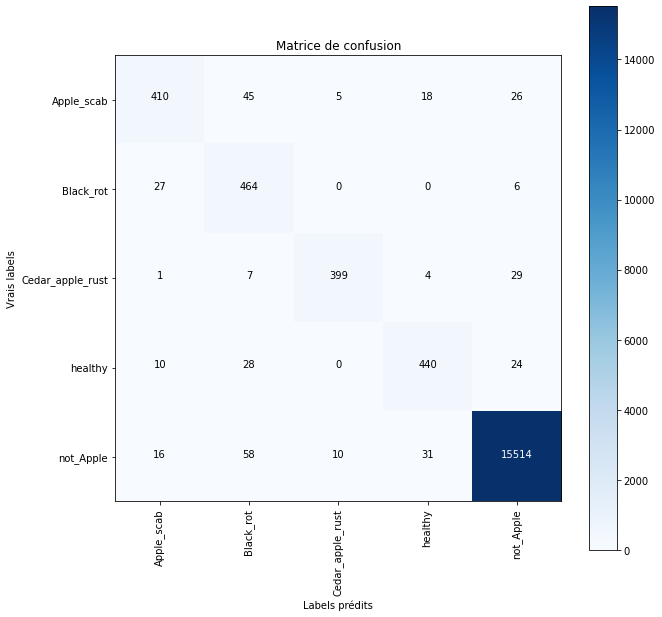

In [ ]:
# Matrice de Confusion

cnf_matrix = metrics.confusion_matrix(df_Apple['Maladie_reelle'],df_Apple['maladie_pred'])

classes = range(0,5)

liste=list_maladie_Apple1
liste.append("not_Apple")
print(list_maladie_Apple1)

plt.figure(figsize=(10, 10))


plt.imshow(cnf_matrix, interpolation='nearest',cmap='Blues')
plt.title("Matrice de confusion")
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)

for i, j in itertools.product(range(cnf_matrix.shape[0]), range(cnf_matrix.shape[1])):
    plt.text(j, i, cnf_matrix[i, j],
             horizontalalignment="center",
             color="white" if cnf_matrix[i, j] > ( cnf_matrix.max() / 2) else "black")

plt.yticks([0,1,2,3,4],liste)
plt.ylabel('Vrais labels')
plt.xticks([0,1,2,3,4],liste,
                  rotation = 90)

plt.xlabel('Labels prédits')

plt.show()

# Predict type maladie de "Corn"

#### Predicted Corn

In [ ]:
model_maladieCorn = tf.keras.models.load_model('/content/drive/MyDrive/model_Corn_Healthy')

In [ ]:
# liste des maladies "Corn"
y_valid_typeMaladie_Corn = y_valid_typeMaladie0[y_valid_categorie0=="Corn_(maize)"]
print(pd.DataFrame(y_valid_typeMaladie_Corn).value_counts())

Common_rust_                           477
Northern_Leaf_Blight                   477
healthy                                465
Cercospora_leaf_spot Gray_leaf_spot    410
dtype: int64


In [ ]:
X_img_predicted_Corn  = X_valid[df_predict_categorie_label['predicted_categorie'] == "Corn_(maize)"]

In [ ]:
predict_typeMaladieCorn = model_maladieCorn.predict(X_img_predicted_Corn)


In [ ]:
predict_typeMaladieCorn_class = predict_typeMaladieCorn.argmax(axis = 1)

In [ ]:
# # Pour retrouver facilement les noms des labels

# dict_maladie_Corn1 = { 2: 'Northern_Leaf_Blight' ,
#                  1: 'Common_rust_' ,
#                  0 : 'Cercospora_leaf_spot Gray_leaf_spot',
#                  3: 'healthy'}

# list_maladie_Corn1 =[ 'Cercospora_leaf_spot Gray_leaf_spot', 'Common_rust_' , 'Northern_Leaf_Blight','healthy' ]

In [ ]:
predict_typeMaladieCorn_label = (pd.DataFrame(predict_typeMaladieCorn_class, columns=['maladie_pred'])).replace({"maladie_pred": dict_maladie_Corn1})
predict_typeMaladieCorn_label.head()

,maladie_pred
0,Cercospora_leaf_spot Gray_leaf_spot
1,Northern_Leaf_Blight
2,Cercospora_leaf_spot Gray_leaf_spot
3,Cercospora_leaf_spot Gray_leaf_spot
4,Cercospora_leaf_spot Gray_leaf_spot


In [ ]:
pd.DataFrame(predict_typeMaladieCorn_label).value_counts()

maladie_pred                       
Cercospora_leaf_spot Gray_leaf_spot    629
healthy                                438
Northern_Leaf_Blight                   431
Common_rust_                           297
dtype: int64

In [ ]:
actual_typeMaladieCorn_label = pd.DataFrame(y_valid_typeMaladie0[df_predict_categorie_label['predicted_categorie'] == "Corn_(maize)"], columns=["Maladie_reelle"])

In [ ]:
actual_typeMaladieCorn_label.value_counts()

Maladie_reelle                     
Common_rust_                           476
Northern_Leaf_Blight                   465
healthy                                457
Cercospora_leaf_spot Gray_leaf_spot    386
Late_blight                              7
Bacterial_spot                           1
Cedar_apple_rust                         1
Leaf_scorch                              1
Powdery_mildew                           1
dtype: int64

In [ ]:
df_predicted_Corn=pd.concat([actual_typeMaladieCorn_label, predict_typeMaladieCorn_label],axis=1)
df_predicted_Corn.head()


,Maladie_reelle,maladie_pred
0,Cedar_apple_rust,Cercospora_leaf_spot Gray_leaf_spot
1,Cercospora_leaf_spot Gray_leaf_spot,Northern_Leaf_Blight
2,Cercospora_leaf_spot Gray_leaf_spot,Cercospora_leaf_spot Gray_leaf_spot
3,Cercospora_leaf_spot Gray_leaf_spot,Cercospora_leaf_spot Gray_leaf_spot
4,Cercospora_leaf_spot Gray_leaf_spot,Cercospora_leaf_spot Gray_leaf_spot


In [ ]:
actual_categorie_Corn = pd.DataFrame(y_valid_categorie0[df_predict_categorie_label['predicted_categorie'] == "Corn_(maize)"], columns=["categorie_reelle"])
actual_categorie_Corn.head()

,categorie_reelle
0,Apple
1,Corn_(maize)
2,Corn_(maize)
3,Corn_(maize)
4,Corn_(maize)


In [ ]:
df_predicted_Corn=pd.concat([df_predicted_Corn, actual_categorie_Corn ],axis=1)
df_predicted_Corn.head()

,Maladie_reelle,maladie_pred,categorie_reelle
0,Cedar_apple_rust,Cercospora_leaf_spot Gray_leaf_spot,Apple
1,Cercospora_leaf_spot Gray_leaf_spot,Northern_Leaf_Blight,Corn_(maize)
2,Cercospora_leaf_spot Gray_leaf_spot,Cercospora_leaf_spot Gray_leaf_spot,Corn_(maize)
3,Cercospora_leaf_spot Gray_leaf_spot,Cercospora_leaf_spot Gray_leaf_spot,Corn_(maize)
4,Cercospora_leaf_spot Gray_leaf_spot,Cercospora_leaf_spot Gray_leaf_spot,Corn_(maize)


In [ ]:
df_predicted_Corn.loc[df_predicted_Corn.categorie_reelle!="Corn_(maize)",'Maladie_reelle']='not_Corn'

df_predicted_Corn=df_predicted_Corn.drop(["categorie_reelle"],axis=1)

In [ ]:
pd.crosstab(df_predicted_Corn['Maladie_reelle'],df_predicted_Corn['maladie_pred'])

maladie_pred,Cercospora_leaf_spot Gray_leaf_spot,Common_rust_,Northern_Leaf_Blight,healthy
Maladie_reelle,,,,
Cercospora_leaf_spot Gray_leaf_spot,366,0,20,0
Common_rust_,185,291,0,0
Northern_Leaf_Blight,55,1,408,1
healthy,14,4,2,437
not_Corn,9,1,1,0


#### Not predicted Corn

In [ ]:
df_NOT_predicted_Corn=pd.DataFrame(y_valid_typeMaladie0[df_predict_categorie_label['predicted_categorie'] != "Corn_(maize)"], columns=["Maladie_reelle"])
df_NOT_predicted_Corn['maladie_pred']='not_Corn'


In [ ]:
actual_categorie_Corn2 = pd.DataFrame(y_valid_categorie0[df_predict_categorie_label['predicted_categorie'] != "Corn_(maize)"], columns=["categorie_reelle"])
df_NOT_predicted_Corn=pd.concat([df_NOT_predicted_Corn, actual_categorie_Corn2 ],axis=1)


In [ ]:
df_NOT_predicted_Corn.loc[df_NOT_predicted_Corn.categorie_reelle!="Corn_(maize)",'Maladie_reelle']='not_Corn'

df_NOT_predicted_Corn=df_NOT_predicted_Corn.drop(["categorie_reelle"],axis=1)


In [ ]:
pd.crosstab(df_NOT_predicted_Corn['Maladie_reelle'],df_NOT_predicted_Corn['maladie_pred'])

maladie_pred,not_Corn
Maladie_reelle,
Cercospora_leaf_spot Gray_leaf_spot,24
Common_rust_,1
Northern_Leaf_Blight,12
healthy,8
not_Corn,15732


#### Predictions des deux modeles

In [ ]:
df_Corn=pd.concat([df_NOT_predicted_Corn,df_predicted_Corn],axis=0)


In [ ]:
pd.crosstab(df_Corn['Maladie_reelle'],df_Corn['maladie_pred'])

maladie_pred,Cercospora_leaf_spot Gray_leaf_spot,Common_rust_,Northern_Leaf_Blight,healthy,not_Corn
Maladie_reelle,,,,,
Cercospora_leaf_spot Gray_leaf_spot,366,0,20,0,24
Common_rust_,185,291,0,0,1
Northern_Leaf_Blight,55,1,408,1,12
healthy,14,4,2,437,8
not_Corn,9,1,1,0,15732


In [ ]:
print(metrics.classification_report(df_Corn['Maladie_reelle'],df_Corn['maladie_pred']))

                                     precision    recall  f1-score   support

Cercospora_leaf_spot Gray_leaf_spot       0.58      0.89      0.70       410
                       Common_rust_       0.98      0.61      0.75       477
               Northern_Leaf_Blight       0.95      0.86      0.90       477
                            healthy       1.00      0.94      0.97       465
                           not_Corn       1.00      1.00      1.00     15743

                           accuracy                           0.98     17572
                          macro avg       0.90      0.86      0.86     17572
                       weighted avg       0.99      0.98      0.98     17572



['Cercospora_leaf_spot Gray_leaf_spot', 'Common_rust_', 'Northern_Leaf_Blight', 'healthy', 'not_Corn']


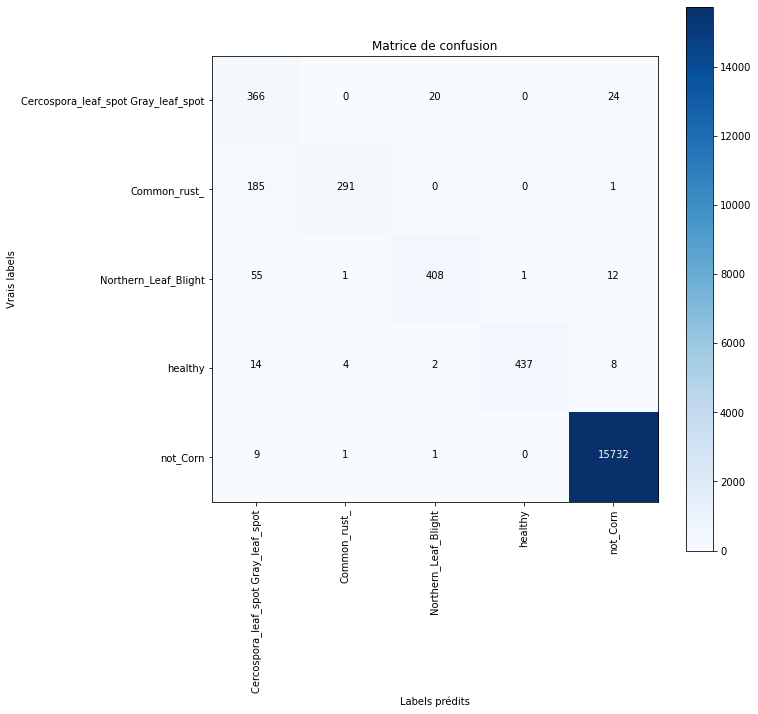

In [ ]:
# Matrice de Confusion

cnf_matrix = metrics.confusion_matrix(df_Corn['Maladie_reelle'],df_Corn['maladie_pred'])

classes = range(0,5)

liste=list_maladie_Corn1
liste.append("not_Corn")
print(list_maladie_Corn1)

plt.figure(figsize=(10, 10))


plt.imshow(cnf_matrix, interpolation='nearest',cmap='Blues')
plt.title("Matrice de confusion")
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)

for i, j in itertools.product(range(cnf_matrix.shape[0]), range(cnf_matrix.shape[1])):
    plt.text(j, i, cnf_matrix[i, j],
             horizontalalignment="center",
             color="white" if cnf_matrix[i, j] > ( cnf_matrix.max() / 2) else "black")

plt.yticks([0,1,2,3,4],liste)
plt.ylabel('Vrais labels')
plt.xticks([0,1,2,3,4],liste,
                  rotation = 90)

plt.xlabel('Labels prédits')

plt.show()